In [1]:
import streamlit
import yfinance
import plotly
import ipywidgets as widgets
import streamlit as st
from datetime import date
import yfinance as yf
from plotly import graph_objs as go
import SP500_data_downloader as SP
from SP500_data_downloader import *
from IPython.display import clear_output

In [2]:
#list of tickers
tickers=SP500()
tick_to_download=SP500()

In [3]:
# define the time span
BEGINNING = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

In [6]:
data=get_data()

[*********************100%***********************]  505 of 505 completed

2 Failed downloads:
- BRK.B: No data found, symbol may be delisted
- BF.B: None


In [7]:
#why it does not save data?

load_button = widgets.Button(description="Click for data!")
output = widgets.Output()

display(load_button, output)

def on_button_clicked(b):
    with output:
        df2=get_data()
        clear_output()
        time = date.today().strftime("%Y-%m-%d")
        print(f"Data are current as of({time}).")

load_button.on_click(on_button_clicked)

Button(description='Click for data!', style=ButtonStyle())

Output()

In [8]:
#How many tickers to choose?
select_number_stocks = widgets.IntSlider(
    value=1, 
    min=1,
    max=4,
    step=1,
    description='The number of stocks:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)

In [9]:
no_stocks=select_number_stocks

In [10]:
#TICKERS
style = {'description_width': 'initial'} # so the text in front of the list box fits/is not cut out mid-word
selected_stocks = widgets.Dropdown(
    options=tickers,
    value="AAPL",
    description='Select ticker for prediction:',
    disabled=False,
    style=style
)

In [11]:
multiple_selected_stocks = widgets.SelectMultiple(
    options=tickers,
    value=['AAPL'],
    description='Select tickers for prediction',
    disabled=False
)

In [12]:
# next, select number of years since 2015 (i.e. the time span from 2015 you want to analyse)
n_years = widgets.IntSlider(
    value=4, # where the slider is in its default state
    min=0,
    max=6,
    step=1,
    description='Number of years:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style=style
)

n_years2 = widgets.IntSlider(
    value=2020,  # where the slider is in its default state
    min=2015,
    max=2021,
    step=1,
    description='The final year:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style=style
)


In [13]:
# DONE button -> show me the output below
done_button = widgets.Button(description='Click here and show me the analysis')

In [14]:
# now, show the first few lines of raw data
data_head = data.head()  # this will not work in VBox

#but you we need to make some modifications if we want to diplay dataframe in VBox
from IPython.display import display

def setup_ui(df):
    
    out = widgets.Output()
    with out:
        display(df)
    return out


data_raw_head=setup_ui(data_head)  # this will work in VBox

ValueError: x and y must be the same size

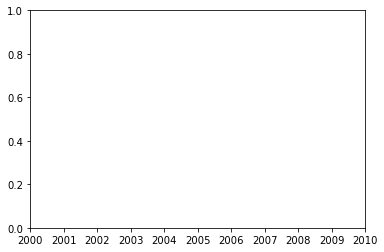

In [15]:
# next, plot it

plot_open = data.plot(x="Date", y="Open", kind="scatter", color="red")

#from plotly import graph_objs as go
#import streamlit as st

#def plot_raw_data():
#    fig=go.Figure() #create plotly graph object
#    fig.add_trace(go.Scatter(x=data["Date"], y=data["Open"], name="stock_open"))
#    fig.add_trace(go.Scatter(x=data["Date"], y=data["Close"], name="stock_close"))
#    fig.layout.update(title_text="Time Series Data", xaxis_rangeslider_visible=True)
#    st.plotly_chart(fig)
    
#plot_raw_data()

In [16]:
text_load_button=widgets.HTML(value="<h1>Before the analysis, please, load the data (This may take a few minutes...) </h1>")
text_wa_title = widgets.HTML(value="<h1>Stock Analysis Web App</h1>")
text_select_number_stocks = widgets.HTML(value="<h3>Select a number of stocks for analysis</h3>")

text_select_ticker = widgets.HTML(value="<h3>Select a ticker for the company of your choice from the list below</h3>")
text_multiple_selected_stocks = widgets.HTML(value="<h3>Select tickers for the companies of your choice from the list below (You can select multiple tickers by holding shift)</h3>")
text_n_years = widgets.HTML(value="<h3>Select a number of years for the analysis since 2015</h3>")
text_n_years2 = widgets.HTML(value="<h3>Select a time span for the analysis since 2015</h3>")

text_done_button = widgets.HTML(value="<h4>Done with the parameters of the dataset analysed? Click on the buttom below </h4>")

text_raw = widgets.HTML(value="<h4>Have a look at the raw data: </h4>")

text_plot_open = widgets.HTML(value="<h4>Have a look at the plotted data of opening prices: </h4>")


In [17]:
#from widgets import VBox
vbox_text=widgets.VBox([text_load_button,load_button, output, text_wa_title, text_select_number_stocks, select_number_stocks, text_multiple_selected_stocks, multiple_selected_stocks,text_select_ticker, selected_stocks, text_n_years, n_years, text_n_years2, n_years2,
                       text_done_button, done_button, text_raw, data_raw_head, text_plot_open,multiple_selected_stocks])
page = vbox_text
display (page)